# Lesson-4 : MD

## Submitted by: S Bhuvanesh
## Roll No: 2018113002

 ***
<a id='lesson-4'></a>
# Lesson-4: Molecular Dynamics
***
- Molecular Dynamics is essentially the application of the Newtons Second Law to molecules, where the force acting on each part of the molecule is computed by modelling its interaction with every other part of the system.
- Total potential energy of the system: 
$$ U = \sum_{i\in\{bonds\}} \frac{1}{2} k_i (d_i - d_{0,i})^2 + \sum_{i\in\{angles\}} \frac{1}{2} k_i (\theta_i - \theta_{0,i})^2 + \sum_{i\in\{dihedrals\}} \phi ( cos(n\theta_i)-1)  + \sum_{i,j\in\{non-bond~pairs\}} ( U_{LJ}(i,j) +  U_{Columbic}(i,j))
$$
- Equations of motion given by:
$$ \frac{d\vec{p}_i}{dt} = \vec{F}_i \\ \frac{d \vec{r}_i}{dt} = \vec{p}_i/m_i $$
- Euler Method:
$$ \vec{p}_i(t+dt) = \vec{p}_i(t) + dt~\vec{F}_i(t) \\ \vec{r}_i(t+dt)=\vec{r}_i(t) + dt\vec{p}_i/m_i
$$
- Check on accuracy: constant total energy, total linear momentum
- Example: Simple harmonic oscillator

## Example: Argon
Argon atom is electrically neutral and a good model for the pair-wise interaction between two Argon atoms is given by Lennard-Jones potential, whose functional form is given by:
$$ U_{LJ} (\vec{r}_i,\vec{r}_j) = 4 \epsilon \left( \left(\frac{\sigma}{r} \right)^{12}- \left(\frac{\sigma}{r} \right)^6 \right)  $$
where $\vec{r} = \vec{r}_i - \vec{r}_j$ and $r=|\vec{r}|$. The force on particle $i$ due to its interaction via LJ potenital with particle $j$ is then given by: $$-\left( \frac{\partial U_{LJ}}{\partial x_i}, \frac{\partial U_{LJ}}{\partial y_i},\frac{\partial U_{LJ}}{\partial z_i} \right)$$
And the total potential of the system of $N$ Argon atoms is sum of all the pairwise interactions, i.e.,
$$ U = \frac{1}{2} \sum_{i,j=1, i\ne j}^N U_{LJ} (\vec{r}_i,\vec{r}_j) $$
Using the Euler method mentioned above, write a program to compute the trajectory of the system! Following functions might need to be written:
- `euler_integrate(timestep)`
- `initialise_config`
- `initialise_momenta`
- `compute_force`, `compute_pairwiseLJ(i,j,sigma,epsilon)`



In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nsteps=1000
dim=3
sigma=1.0
epsilon=1.0
timestep = 0.01

In [95]:
m=1
class argon :
    def __init__( self, pos:(float,float,float)=(0.0,0.0,0.0),vel:(float,float,float)=(0.0,0.0,0.0)):
        self.pos = np.random.rand(3)*50
        self.vel = np.zeros(3)

In [58]:
ep = 1.0
si = 1.0


def poten(atom1:argon , atom2:argon):
    r = ((atom1.pos[0]-atom2.pos[0])**2+(atom1.pos[1]-atom2.pos[1])**2+(atom1.pos[2]-atom2.pos[2])**2)**0.5
    return 4*ep*((si/r)**12 - (si/r)**6)

def fx(atom1:argon , atom2:argon):
    r = ((atom1.pos[0]-atom2.pos[0])**2+(atom1.pos[1]-atom2.pos[1])**2+(atom1.pos[2]-atom2.pos[2])**2)**0.5
    return -4*ep*(12*(si**12)/(r**13) - 6*(si**6)/(r**7))*(atom2.pos[0]-atom1.pos[0])/r

def fy(atom1:argon , atom2:argon):
    r = ((atom1.pos[0]-atom2.pos[0])**2+(atom1.pos[1]-atom2.pos[1])**2+(atom1.pos[2]-atom2.pos[2])**2)**0.5
    return -4*ep*(12*(si**12)/(r**13) - 6*(si**6)/(r**7))*(atom2.pos[1]-atom1.pos[1])/r

def fz(atom1:argon , atom2:argon):
    r = ((atom1.pos[0]-atom2.pos[0])**2+(atom1.pos[1]-atom2.pos[1])**2+(atom1.pos[2]-atom2.pos[2])**2)**0.5
    return -4*ep*(12*(si**12)/(r**13) - 6*(si**6)/(r**7))*(atom2.pos[2]-atom1.pos[2])/r

In [59]:
def update(n,time):
    for i in range(n):
        for j in range(i+1,n):
            a=[0,0,0]
            a[0] = fx(atom[i],atom[j])/m
            a[1] = fy(atom[i],atom[j])/m
            a[2] = fz(atom[i],atom[j])/m
            for k in range(3):
                atom[i].vel[k] = atom[i].vel[k] + time * a[k]
                atom[j].vel[k] = atom[j].vel[k] - time * a[k]
                atom[i].pos[k] = atom[i].pos[k] + time * atom[i].vel[k]
                atom[j].pos[k] = atom[j].pos[k] + time * atom[j].vel[k]


In [60]:
def kinenergy(n):
    s = 0
    for i in range(n):
        for j in range(3):
            s = s + m * atom[i].vel[j] * atom[i].vel[j] / 2
        
    return s

In [61]:
def potenergy(n):
    s=0
    for i in range(n):
        for j in range(i+1,n):
            s = s + poten(atom[i],atom[j])
    return s 

In [96]:
n=10#Number of Atoms

atom = [argon() for _ in range(n)]
tpe = []
tke = []
tte = []
t = []
for i in np.arange(0,10,timestep) :
    t = np.append(t,i)
    update(n,timestep)
    pe = potenergy(n)
    tpe = np.append(tpe,pe)
    ke = kinenergy(n)
    tke = np.append(tke,ke)
    tte = np.append(tte,ke+pe)
    
    
    

In [97]:
print(1/(np.amax(tke)-np.amin(tke))/ (np.amax(tpe)- np.amin(tpe)))
tpe = (tpe - np.amin(tpe)) * (np.amax(tke)-np.amin(tke))/ (np.amax(tpe)- np.amin(tpe))  + np.amin(tpe)

60962.71221708542


<IPython.core.display.Javascript object>


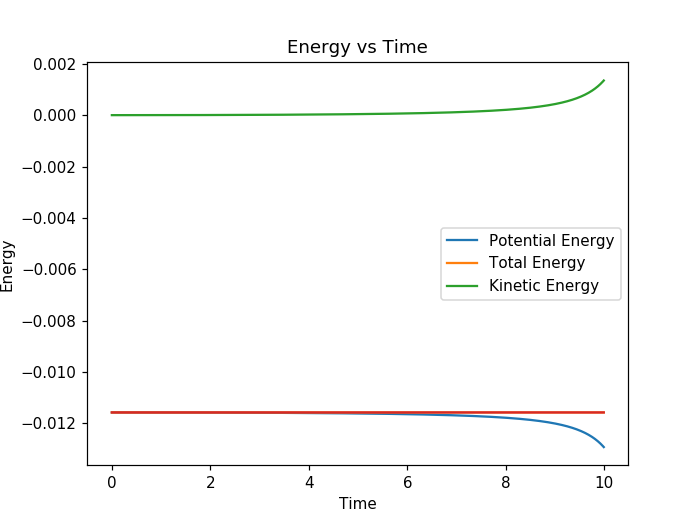

Text(0.5, 1.0, 'Energy vs Time')

In [98]:
tte = tke + tpe
plt.plot(t,tpe,label="Potential Energy")
plt.plot(t,tte,label="Total Energy")
plt.plot(t,tke,label="Kinetic Energy")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Energy vs Time")



<IPython.core.display.Javascript object>


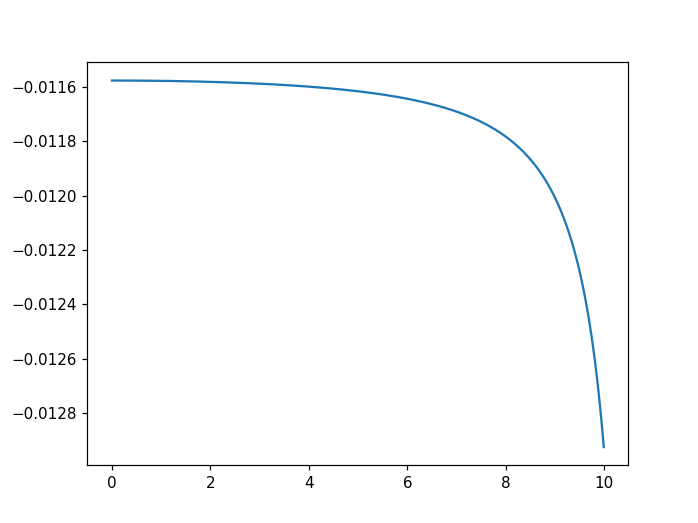

In [101]:
plt.plot(t,tpe)

### We see that the total energy of the system approximately remains constant.
### This is a consequence of computational approximations. 